In [20]:
import os

#core dependencies
import pandas as pd
import numpy as np
import json
import re


#sklearn machine learning libraries
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA,KernelPCA
from sklearn.cluster import KMeans
from IPython.display import display, HTML
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

#visualizations
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#LDA Libraries
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
import spacy

#Visualizations
import pyLDAvis
import pyLDAvis.sklearn

In [21]:
#reading in data

df = pd.read_csv('name_cuisine_flavors.csv', index_col = 0)

In [47]:
df[df['cuisine'] == 'chinese'].head()

,recipeName,cuisine,piquant,meaty,bitter,sweet,sour,salty
8096,Better Than Takeout Chinese Fried Rice,chinese,0.000000,0.833333,0.833333,0.166667,0.166667,0.833333
8097,Sticky Chinese Pork Belly,chinese,0.666667,0.833333,0.166667,0.166667,0.166667,0.166667
8098,Healthy Sesame Chicken with Broccoli,chinese,0.166667,0.333333,0.833333,0.500000,0.833333,0.833333
8099,Chinese Orange Chicken,chinese,0.500000,0.166667,0.166667,0.666667,0.500000,0.833333
8100,Chinese Chicken Zoodles,chinese,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df.head(5)

,recipeName,cuisine,piquant,meaty,bitter,sweet,sour,salty
0,Easy Seafood Paella,spanish,0.666667,0.166667,0.333333,0.166667,0.166667,0.166667
1,Spanish-style Garlic Shrimp,spanish,0.833333,0.833333,0.833333,0.166667,0.666667,0.833333
2,Classic Paella,spanish,0.166667,0.166667,0.333333,0.166667,0.666667,0.166667
3,One Pot Spanish Chicken and Rice,spanish,0.166667,0.166667,0.166667,0.166667,0.833333,0.166667
4,Portuguese Fish Stew,spanish,0.500000,0.166667,0.166667,0.166667,0.500000,0.333333


In [23]:
def get_similiar_flavor_recipes(recipe,number):
    X = df.iloc[0:,2:8].values
    dist_recipe = pairwise_distances(X, X[recipe].reshape(1,-1),metric ='euclidean')
    matches = np.argsort(dist_recipe.transpose()[0], axis = -1)
    return df.iloc[matches[:number]].drop(recipe,axis = 0)

In [24]:
X = df.iloc[0:,2:8].values
X

array([[0.66666667, 0.16666667, 0.33333333, 0.16666667, 0.16666667,
        0.16666667],
       [0.83333333, 0.83333333, 0.83333333, 0.16666667, 0.66666667,
        0.83333333],
       [0.16666667, 0.16666667, 0.33333333, 0.16666667, 0.66666667,
        0.16666667],
       ...,
       [0.33333333, 0.16666667, 0.83333333, 0.16666667, 0.83333333,
        0.83333333],
       [0.16666667, 0.66666667, 0.66666667, 0.33333333, 0.66666667,
        0.66666667],
       [0.        , 0.16666667, 0.83333333, 0.16666667, 0.5       ,
        0.83333333]])

In [58]:
dish = 8312
df.iloc[dish]

recipeName    Chinese Pepper Steak
cuisine                    chinese
piquant                   0.333333
meaty                     0.333333
bitter                         0.5
sweet                     0.166667
sour                      0.833333
salty                     0.833333
Name: 8312, dtype: object

In [60]:
df.iloc[9884]

recipeName    Beef Schnitzel
cuisine               german
piquant             0.333333
meaty               0.333333
bitter              0.666667
sweet               0.166667
sour                0.833333
salty               0.833333
Name: 9884, dtype: object

In [59]:
get_similiar_flavor_recipes(dish,-1)

,recipeName,cuisine,piquant,meaty,bitter,sweet,sour,salty
3628,Grilled Tandoori Chicken,indian,0.333333,0.333333,0.500000,0.166667,0.666667,0.833333
4293,Hot Skillet Sirloin Wraps with Blue Cheese,american,0.333333,0.333333,0.666667,0.166667,0.833333,0.833333
9884,Beef Schnitzel,german,0.333333,0.333333,0.666667,0.166667,0.833333,0.833333
8227,Chinese Pepper Steak (Stir-Fried Beef with Oni...,chinese,0.333333,0.333333,0.333333,0.166667,0.833333,0.833333
10079,Espetada (Portuguese Beef Skewers)‪,portuguese,0.333333,0.333333,0.666667,0.166667,0.833333,0.833333
10718,Sheetpan Greek Chicken and Vegetables,greek,0.166667,0.333333,0.500000,0.166667,0.833333,0.833333
4165,Sausage and Peppers With Parmesan Cheese Grits,american,0.333333,0.166667,0.500000,0.166667,0.833333,0.833333
9966,Bratwurst Cooked in Beer With Smothered Cabbage,german,0.333333,0.166667,0.500000,0.166667,0.833333,0.833333
7006,Chicken Fajita Quesadillas,mexican,0.333333,0.500000,0.500000,0.166667,0.833333,0.833333
8138,Spicy Garlic and Pepper Shrimp Stir-Fry,chinese,0.166667,0.333333,0.500000,0.166667,0.833333,0.833333


In [27]:
df.iloc[0]

recipeName    Easy Seafood Paella
cuisine                   spanish
piquant                  0.666667
meaty                    0.166667
bitter                   0.333333
sweet                    0.166667
sour                     0.166667
salty                    0.166667
Name: 0, dtype: object

# PCA Analysis On Flavors

In [28]:
#standardize flavors for PCA
X = df.iloc[0:,2:8]

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

scaled_df = pd.DataFrame(scaled_df, columns=X.columns)

scaled_df = pd.concat([df[['recipeName','cuisine']], scaled_df], axis=1)

scaled_df

,recipeName,cuisine,piquant,meaty,bitter,sweet,sour,salty
0,Easy Seafood Paella,spanish,1.342654,-0.858464,-0.305933,-0.366560,-1.030917,-1.157409
1,Spanish-style Garlic Shrimp,spanish,1.902339,1.772768,1.576510,-0.366560,0.797966,1.222303
2,Classic Paella,spanish,-0.336403,-0.858464,-0.305933,-0.366560,0.797966,-1.157409
3,One Pot Spanish Chicken and Rice,spanish,-0.336403,-0.858464,-0.933414,-0.366560,1.407593,-1.157409
4,Portuguese Fish Stew,spanish,0.782968,-0.858464,-0.933414,-0.366560,0.188338,-0.562481
5,Portuguese Seafood Stew,spanish,0.223282,-0.858464,0.949029,-0.366560,0.797966,-1.157409
6,Spanish Chicken with Chorizo and Potatoes,spanish,1.902339,1.772768,0.321548,-0.366560,0.188338,0.032447
7,Mushroom Paella,spanish,-0.336403,-0.858464,-0.933414,-0.366560,0.797966,-1.157409
8,Spanish Chicken with Chorizo and Potatoes,spanish,1.902339,1.772768,-0.305933,-0.366560,0.797966,0.032447
9,Spanish-Style Chicken with Saffron Rice (Arroz...,spanish,-0.336403,-0.858464,-0.933414,-0.366560,0.797966,-1.157409


In [29]:
pca_data = scaled_df.iloc[0:,2:8]

In [30]:
#visualize

pca_visualize  = KernelPCA(n_components=2, kernel='cosine', n_jobs=-1,random_state=1).fit_transform(pca_data)


In [31]:
principalDf = pd.DataFrame(data = pca_visualize
             , columns = ['principal component 1', 'principal component 2'])

In [42]:
df_pca_analysis = pd.concat([principalDf, df[['cuisine','recipeName']]], axis=1)
df_pca_analysis.head()

,principal component 1,principal component 2,cuisine,recipeName
0,-0.392339,-0.043882,spanish,Easy Seafood Paella
1,0.768224,0.360736,spanish,Spanish-style Garlic Shrimp
2,-0.780639,0.312720,spanish,Classic Paella
3,-0.802310,0.384425,spanish,One Pot Spanish Chicken and Rice
4,-0.720389,0.312765,spanish,Portuguese Fish Stew


In [43]:
#df_pca_analysis.to_csv('tableau_pca_flavors.csv') #send to tableau for more vizualizations

<Figure size 1440x720 with 0 Axes>

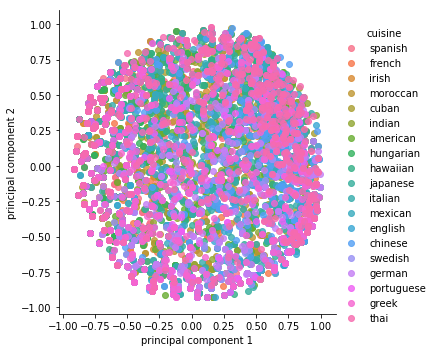

In [34]:
#PCA Analysis on Ingredients
plt.figure(figsize = (20,10))
#sns.set(style="whitegrid", palette="muted")
sns.lmplot("principal component 1", "principal component 2", data=df_pca_analysis, hue = 'cuisine', fit_reg=False)

In [35]:
#find out the variance explained for these two components explained variance ratio

pca_visualize_notkernal  = PCA(n_components=2,random_state=7)
pca_visualize2= pca_visualize_notkernal.fit_transform(pca_data)

In [36]:
principalDf2 = pd.DataFrame(data = pca_visualize2
             , columns = ['principal component 1', 'principal component 2'])

In [37]:
df_pca_analysis2 = pd.concat([principalDf2, df[['cuisine']]], axis=1)
df_pca_analysis2.head()

,principal component 1,principal component 2,cuisine
0,-1.130812,0.039443,spanish
1,2.343698,0.509200,spanish
2,-1.403348,0.600708,spanish
3,-1.842526,0.978525,spanish
4,-1.290654,0.624952,spanish


<Figure size 1440x720 with 0 Axes>

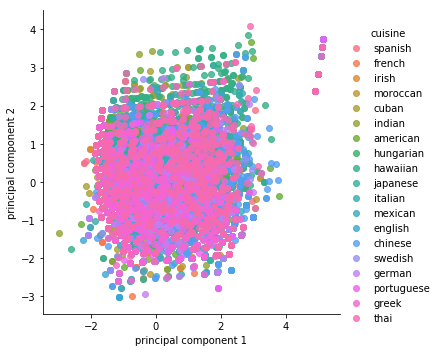

In [38]:
#PCA Analysis on Ingredients
plt.figure(figsize = (20,10))
#sns.set(style="whitegrid", palette="muted")
sns.lmplot("principal component 1", "principal component 2", data=df_pca_analysis2, hue = 'cuisine', fit_reg=False)

In [39]:
pca_visualize_notkernal.explained_variance_ratio_ #60% variance explained by two components

array([0.3366827 , 0.23123331])

In [40]:
# PCA component breakdown
pd.DataFrame(pca_visualize_notkernal.components_,columns=pca_data.columns,index = ['PC-1','PC-2'])
#First component are meaty, bitter, and salty foods
#Second Compnent are spicy and sour foods

,piquant,meaty,bitter,sweet,sour,salty
PC-1,0.080937,0.343652,0.627320,0.298448,-0.074711,0.622229
PC-2,0.409939,-0.459022,0.061689,0.386546,0.683246,0.034631
